# Loading in the Data

In [23]:
import pandas as pd
url = 'https://raw.github.sydney.edu.au/awon6941/DATA3406_Group4/master/owid-covid-data.csv?token=AAAA6WPK6RZFDLJJ62KGLJK7SDSXG' #has to be raw.github link 
df1 = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

# Filtering Data 

This was mostly done just to see if Malaysia was on the list. 

In [96]:
my = df1['location']=='Malaysia' 
dfMy = df1[my]

dfMy.head(3)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
32741,MYS,Asia,Malaysia,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32365998.0,96.254,29.9,6.293,3.407,26808.164,0.1,260.942,16.74,1.0,42.4,NaN,1.9,76.16,0.802
32742,MYS,Asia,Malaysia,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,32365998.0,96.254,29.9,6.293,3.407,26808.164,0.1,260.942,16.74,1.0,42.4,NaN,1.9,76.16,0.802
32743,MYS,Asia,Malaysia,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,32365998.0,96.254,29.9,6.293,3.407,26808.164,0.1,260.942,16.74,1.0,42.4,NaN,1.9,76.16,0.802


# Overview of New cases and deaths

Below is a general overview of the new cases and deaths overtime in Malaysia.

[]

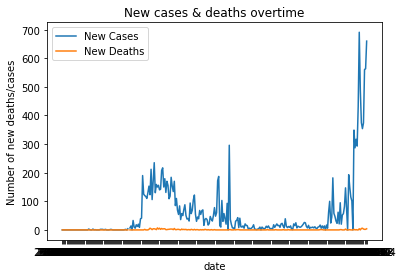

In [27]:
import matplotlib.pyplot as plt
dfOverview = pd.DataFrame(df1,columns=['location','date','new_cases','new_deaths']) # filter by columns
dfOverview = dfOverview[dfOverview['location'].isin(['Malaysia'])] # filter by country

plt.plot(dfOverview['date'],dfOverview['new_cases'],label="New Cases")
plt.plot(dfOverview['date'],dfOverview['new_deaths'],label ="New Deaths")
plt.xlabel("date")
plt.ylabel("Number of new deaths/cases")
plt.title("New cases & deaths overtime")
plt.legend()
plt.plot()

Looking at the graph, at first glance, you will notice that when comparing the new deaths with new cases, although it is hard to see, new deaths don't appear to exceed double digits. 

However, what peaked my interest, is when looking at the influx of new cases. There is the initial boom at the start that can be attributed to the first-wave, but there is a period where the influx of new cases seemed to be very low, but saw a massive spike towards the end. 

# Analysing the cause of peaks in new cases.

Looking at the dataset, I noticed a column labeled the stringency index. Doing some quick research I found that this index essentially measures a country's response to the epidemic. (https://www.civilsdaily.com/news/what-is-stringency-index/) 

Noticing this, I wanted to look into the causes of the spike in cases towards the end of the graph, and to determine if this may have been due to poor management by the Government or if it was due to some other external factors.

In [89]:
dfStrinIndex = pd.DataFrame(df1,columns=['location','date','new_cases','stringency_index']) # filter by columns
dfStrinIndex = dfStrinIndex[dfStrinIndex['location'].isin(['Malaysia'])] # filter by country
#dfStrinIndex = dfStrinIndex['stringency_index'].fillna(0) # replace NaN with 0 
strin_index = dfStrinIndex[dfStrinIndex['stringency_index'] > 0]

strin_index = strin_index["stringency_index"]

max_strin_index = strin_index.max()
min_strin_index = strin_index.min()

Looking into the highest and lowest (excluding null values) the index has reached in the country. 

In [90]:
print("Max Stringency Index: %0.02f" %(max_strin_index))
print("Min Stringency Index (Excluding null values): %0.02f" %(min_strin_index))

Max Stringency Index: 75.00
Min Stringency Index (Excluding null values): 11.11


Looking at all the times where the index was at 75

In [91]:
strin_index = dfStrinIndex[dfStrinIndex['stringency_index'] == 75]
strin_index

,location,date,new_cases,stringency_index
32885,Malaysia,2020-05-23,78.0,75.0
32886,Malaysia,2020-05-24,48.0,75.0
32887,Malaysia,2020-05-25,60.0,75.0
32888,Malaysia,2020-05-26,172.0,75.0
32889,Malaysia,2020-05-27,187.0,75.0
32890,Malaysia,2020-05-28,15.0,75.0
32891,Malaysia,2020-05-29,10.0,75.0
32892,Malaysia,2020-05-30,103.0,75.0
32893,Malaysia,2020-05-31,30.0,75.0
32894,Malaysia,2020-06-01,57.0,75.0


Malaysia's response to the pandemic was what they called the Movement Control Order (MCO) - labelled as a "lockdown" or "partial lockdown" by international media. 

When investigating these dates it appears that on the 14th of May 2020, the Malaysian government had put inplace increased restrictions measures nationwide (Enhanced Movement Control Order), calling in the military to set up roadblocks, which explains the **stringency index of 75**. 

These increased restrictions ended on the 09th of June. 

Source: https://en.wikipedia.org/wiki/2020_Malaysia_movement_control_order 

When looking at the number of new cases during the period in which the stringency index was at its highest, the number of new cases appeared to have been suppressed. 

A thing to note is that most of the sudden spikes in cases during these periods, may have been due to transmission in prisons, as when looking at the COVID-19 Situation Reports (https://www.who.int/malaysia/internal-publications-detail/covid-19-in-malaysia-situation-report-07) is reported that "As of 3 June, more than 400 detainees had tested positive for COVID-19. 

This contributes to the notion of poor management by the government as prisons are governmental facilities.

Wanting to investigate the spikes, namely looking at the dates, I filtered out the dataframe to only the number of new cases that were greater than 200.

In [94]:
strin_index = dfStrinIndex[dfStrinIndex['new_cases'] > 200]
strin_index

,location,date,new_cases,stringency_index
32825,Malaysia,2020-03-24,212.0,73.15
32828,Malaysia,2020-03-27,235.0,73.15
32835,Malaysia,2020-04-03,208.0,73.15
32836,Malaysia,2020-04-04,217.0,73.15
32899,Malaysia,2020-06-06,296.0,75.00
33017,Malaysia,2020-10-02,349.0,50.93
33018,Malaysia,2020-10-03,287.0,50.93
33019,Malaysia,2020-10-04,317.0,50.93
33020,Malaysia,2020-10-05,293.0,50.93
33021,Malaysia,2020-10-06,432.0,50.93


According to the `COVID-19 in Malaysia Situation Report 20`, "On 3 October, Malaysia recorded 317 new COVID-19 cases, the highest single-day report of
confirmed cases since the start of the outbreak."

The table above appears to have recorded it on the 4th of October however.

Looking at the table above, you can see that from the 2nd of October onwards the number of new cases each day has not dropped below 200. 

Reading the reports, it appears that prior to this, the majority of the cases have been reported in 2 states. Sabah and Kedah. Interestingly in the report, Sabah seems to have been singled out in out of the statements, "The Ministry of Health (MOH) has stated that COVID-19 transmission is in the community and . **no longer limited to Sabah**" 
(Source: https://www.who.int/malaysia/internal-publications-detail/covid-19-in-malaysia-situation-report-20)

Looking further into this, it appears that Sabah has been singled out as the surge of infections may have been as a result of Sabah elections, as reported by the South China Morning Post.

(Source: https://www.scmp.com/week-asia/health-environment/article/3104421/coronavirus-malaysia-pm-blames-sabah-election-among) 

Based on my analysis, and background research it appears that the sudden spikes during the early parts of October (end of the graph above) may indicate poor management of the epidemic by the Malaysian government.

Early in this document, I found that despite the increased restricitons by the government, with a stringency index of 75 (out of 100). There were still daily cases that exceeded 3 digits during the those periods. Most of which were attributed to transmissions within prisons. 

There doesn't appear to be a clear plan of action, based on the MCO timeline. Restrictions are merely increased or extended based on the daily reported cases. Restrictions are eased and then reimposed once new cases spike.
(https://en.wikipedia.org/wiki/2020_Malaysia_movement_control_order) 

There is also the case of pure negligence, with politicans holding rallies during a pandemic. 

There may also be a case for the general population's apethy to the situation. During the early days of the MCO, people were still disregarding restrictions (https://www.soyacincau.com/2020/03/18/covid-19-movement-control-order-eating-restaurant-dine-in-food/) and going out. And based on the 75 stringency index, it appeared that military presense was required in order to make a significant different.
(https://www.nst.com.my/news/nation/2020/03/577213/7500-military-personnel-enforcing-mco-nationwide) 
